# Pipe Line Demo

## Import libraries

In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage.measurements import label
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle
% matplotlib inline

## Load utility funcitons

In [2]:
from lib import *

## Load test image

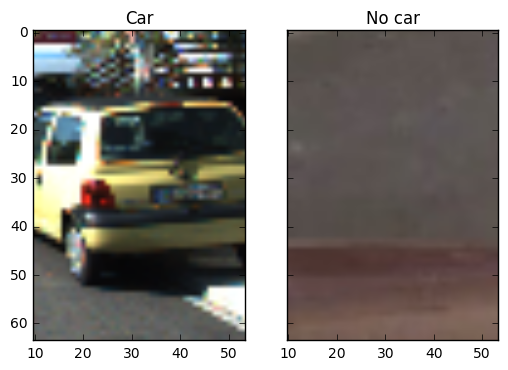

In [3]:
car = cv2.imread("./test_images/car.png")
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
nocar = cv2.imread("./test_images/nocar.png")
nocar = cv2.cvtColor(nocar, cv2.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(car)
ax1.set_title("Car")
ax2.imshow(nocar)
ax2.set_title("No car")

## Color features

We would like to compare color dispersions in different color space

In [ ]:
def hist_feature_plot(hist_features, title="Histogram for each channel"):
    hist = hist_features.reshape((3, -1))
    f, (ax1, ax2, ax3) = plt.subplots(3, 1)
    ax1.bar(range(len(hist[0])), hist[0])
    ax2.bar(range(len(hist[1])), hist[1])
    ax3.bar(range(len(hist[2])), hist[2])
    f.suptitle(title)
    return (ax1, ax2, ax3)

In [ ]:
# Car color in RGB
plot3d(car)
plt.title("Car in RGB")
hist_features = color_hist(car)
hist_feature_plot(hist_features)

In [ ]:
# No car color in RGB
plot3d(nocar)
plt.title("Not car in RGB")
hist_features = color_hist(nocar)
hist_feature_plot(hist_features)

Compare color dispersion in HSV

In [ ]:
# Car color in HSV
car_HSV = cv2.cvtColor(car, cv2.COLOR_RGB2HSV)
plot3d(car_HSV, "HSV")
plt.title("Car in HSV")
hist_features = color_hist(car_HSV)
hist_feature_plot(hist_features)

In [ ]:
# No car color in HSV
nocar_HSV = cv2.cvtColor(nocar, cv2.COLOR_RGB2HSV)
plot3d(nocar_HSV, "HSV")
plt.title("Not car in HSV")
hist_features = color_hist(nocar_HSV)
hist_feature_plot(hist_features)

Compare color dispersion in HLS

In [ ]:
# Car color in HLS
car_HLS = cv2.cvtColor(car, cv2.COLOR_RGB2HLS)
plot3d(car_HLS, "HLS")
plt.title("Not car in HLS")
hist_features = color_hist(car_HLS)
hist_feature_plot(hist_features)

In [ ]:
# NoCar color in HLS
nocar_HSL = cv2.cvtColor(nocar, cv2.COLOR_RGB2HLS)
plot3d(nocar_HSL, "HLS")
plt.title("Not car in HLS")
hist_features = color_hist(nocar_HSL)
hist_feature_plot(hist_features)

In [ ]:
# Car color in YUV
car_YUV = cv2.cvtColor(car, cv2.COLOR_RGB2YUV)
plot3d(car_YUV, "YUV")
plt.title("Car in YUV")
hist_features = color_hist(car_YUV)
hist_feature_plot(hist_features)

In [ ]:
# No Car color in YUV
nocar_YUV = cv2.cvtColor(nocar, cv2.COLOR_RGB2YUV)
plot3d(nocar_YUV, "YUV")
plt.title("Not car in YUV")
hist_features = color_hist(nocar_YUV)
hist_feature_plot(hist_features)

In [ ]:
# Car color in LUV
car_LUV = cv2.cvtColor(car, cv2.COLOR_RGB2LUV)
plot3d(car_LUV, "YUV")
plt.title("Car in YUV")
hist_features = color_hist(car_LUV)
hist_feature_plot(hist_features)

In [ ]:
# No Car color in LUV
nocar_LUV = cv2.cvtColor(nocar, cv2.COLOR_RGB2LUV)
plot3d(nocar_LUV, "LUV")
plt.title("Not car in LUV")
hist_features = color_hist(nocar_LUV)
hist_feature_plot(hist_features)

From the above images, both HSV and HLS have better dispersion than RGB. So we will build color features using HLS as a start.

## Gradient Features

In [ ]:
# Tweak these parameters and see how the results change.
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 1 # Can be 0, 1, 2

hog_features, hog_image = get_hog_features(car_LUV[:, :, hog_channel],
                                           orient, pix_per_cell,
                                           cell_per_block, vis=True,
                                           feature_vec=True)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(car_HLS[:, :, hog_channel])
ax2.imshow(hog_image)

## Combine Features

In [ ]:
# Normalize color
car_norm = car.astype(np.float32)/255
# Car color in HLS
car_HLS = cv2.cvtColor(car_norm, cv2.COLOR_RGB2HLS)

spatial_features = bin_spatial(car_HLS, size=(32, 32))
hist_features = color_hist(car_HLS)
hog_features = get_hog_features(car_HLS[:, :, hog_channel], orient, pix_per_cell, cell_per_block, 
                                vis=False, feature_vec=True)
print(spatial_features.shape, hist_features.shape, hog_features.shape)
features = np.hstack((spatial_features, hist_features, hog_features))

plt.title("Not Standardized")
plt.bar(range(len(features)), features)

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(features.reshape(-1, 1))
plt.figure()
plt.title("Standardized")
plt.bar(range(len(scaled_features)), scaled_features)

In [ ]:
# Normalize color
nocar_norm = nocar.astype(np.float32)/255
# Car color in HLS
nocar_HLS = cv2.cvtColor(nocar_norm, cv2.COLOR_RGB2HLS)

spatial_features = bin_spatial(nocar_HLS, size=(32, 32))
hist_features = color_hist(nocar_HLS)
hog_features = get_hog_features(nocar_HLS[:, :, hog_channel], orient, pix_per_cell, cell_per_block, 
                                vis=False, feature_vec=True)
print(spatial_features.shape, hist_features.shape, hog_features.shape)
features = np.hstack((spatial_features, hist_features, hog_features))

plt.title("Not Standardized")
plt.bar(range(len(features)), features)

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(features.reshape(-1, 1))
plt.figure()
plt.title("Standardized")
plt.bar(range(len(scaled_features)), scaled_features)

## Building model

In [17]:
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def get_image_files():
    car_path = "./data/vehicles/"
    not_car_path = "./data/non-vehicles/"

    car_files = glob.glob(car_path + '/**/*.png', recursive=True)
    y_car = np.ones(len(car_files), dtype=np.int)
    not_car_files = glob.glob(not_car_path + '/**/*.png', recursive=True)
    y_not_car = np.zeros(len(not_car_files), dtype=np.int)

    X = np.concatenate([car_files, not_car_files])
    y = np.concatenate([y_car, y_not_car])
    X_names, y = shuffle(X, y)
    return X_names, y

X_names, y = get_image_files()

In [ ]:
print(len(X_names), len(y))

### HOG features

In [ ]:
%%time
# Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 'ALL' # Can be 0, 1, 2 or "ALL"
X = extract_gradient_features(X_names, 
                     cspace=colorspace,
                     orient=orient,
                     pix_per_cell=pix_per_cell,
                     cell_per_block=cell_per_block,
                     hog_channel=hog_channel)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
%%time
svc = LinearSVC()
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

### color features

In [11]:
%%time
# Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (32, 32)
hist_bins = 80
hist_range=(0, 256)

X = extract_color_features(X_names,
                       cspace=colorspace,
                       spatial_size=spatial_size,
                       hist_bins=hist_bins,
                       hist_range=hist_range)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

NameError: name 'X_names' is not defined

In [ ]:
%%time
svc = LinearSVC()
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

### Combine two features

In [18]:
%%time
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 'ALL' # Can be 0, 1, 2 or "ALL"

X_gradient = extract_gradient_features(X_names, 
                             cspace=colorspace,
                             orient=orient,
                             pix_per_cell=pix_per_cell,
                             cell_per_block=cell_per_block,
                             hog_channel=hog_channel)
print(X_gradient[0].shape)
colorspace = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (32, 32)
hist_bins = 100
hist_range=(0, 256)

X_color = extract_color_features(X_names,
                               cspace=colorspace,
                               spatial_size=spatial_size,
                               hist_bins=hist_bins,
                               hist_range=hist_range)
print(X_color[0].shape)
X = np.hstack((X_color, X_gradient))
print(X[0].shape)
X_scaler = StandardScaler().fit(X)
X = X_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

(2304,)
(3372,)
(5676,)
CPU times: user 2min 1s, sys: 1.36 s, total: 2min 2s
Wall time: 1min 59s


In [27]:
%%time
svc = LinearSVC(C=1e-4)
svc.fit(X_train, y_train)

CPU times: user 1.81 s, sys: 232 ms, total: 2.04 s
Wall time: 2.04 s


In [28]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

0.994369369369 0.994219653179


Visualize prediction confidence

<Container object of 100 artists>

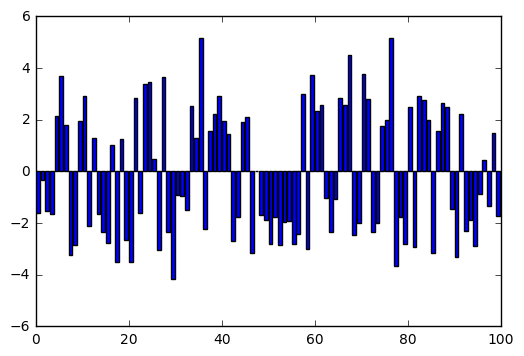

In [21]:
y_dec = svc.decision_function(X_test)
plt.bar(range(len(y_dec[:100])), y_dec[:100])

Save model

In [22]:
import pickle
with open("svc.pkl", "wb") as f:
    pickle.dump(svc, f)
with open("X_scaler.pkl", "wb") as f:
    pickle.dump(X_scaler, f)

## Sliding window search

Load test image

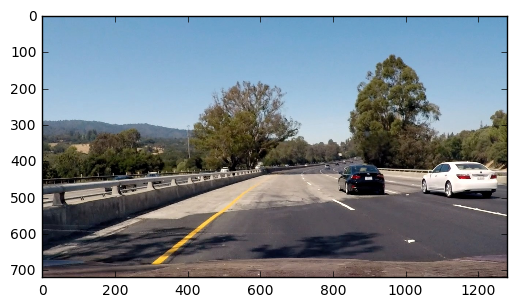

In [23]:
img_file = './test_images/test4.jpg'
test_img = mpimg.imread(img_file)
plt.imshow(test_img)

Load model and scaler

In [24]:
import pickle
with open("svc.pkl", "rb") as f:
    svc =pickle.load(f)
with open("X_scaler.pkl", "rb") as f:
    X_scaler = pickle.load(f)

slide window search

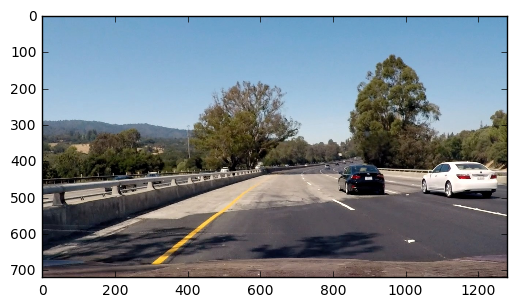

In [26]:
ystart = 350
ystop = 656
scale = 1.2

orient = 12
pix_per_cell = 8
cell_per_block = 1

spatial_size = (32, 32)
hist_bins = 100

boxes, draw_img = find_cars(test_img,
                      ystart,
                      ystop,
                      scale,
                      svc,
                      X_scaler,
                      orient,
                      pix_per_cell,
                      cell_per_block,
                      spatial_size,
                      hist_bins,
                      draw=True)
plt.imshow(draw_img)

## Heat map and filtering

In [13]:
heat = np.zeros_like(test_img[:,:,0]).astype(np.float)
scales = [1.0, 1.2, 1.4, 1.6]
box_list = []
for scale in scales:
    boxes = find_cars(test_img,
                      ystart,
                      ystop,
                      scale,
                      svc,
                      X_scaler,
                      orient,
                      pix_per_cell,
                      cell_per_block,
                      spatial_size,
                      hist_bins,
                      draw=False)
    if boxes:
        box_list.extend(boxes)

In [14]:
heat = np.zeros_like(test_img[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat, box_list)
print(heat.shape)
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
bboxes = labeled_bboxes(labels)
draw_img = draw_boxes(test_img, bboxes)

(720, 1280)


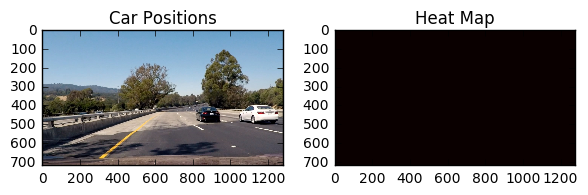

In [15]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()